In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('D:/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train['Fare'].max()

512.3292

In [5]:
train['Age'].min()

0.42

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


percentage of femles who survived: 74.20382165605095
percentage of males who survived: 18.890814558058924


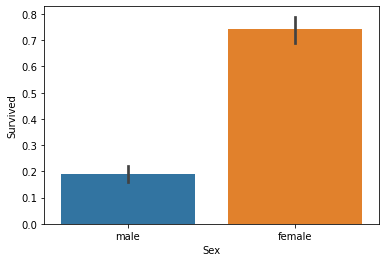

In [7]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)
#print percentages of females vs. males that survive
print("percentage of femles who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize= True)[1]*100)
print("percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize= True)[1]*100)

Percentage of Pclass=1 who Survived: 62.96296296296296
Percentage of Pclass=2 who Survived: 47.28260869565217
Percentage of Pclass=3 who Survived: 24.236252545824847


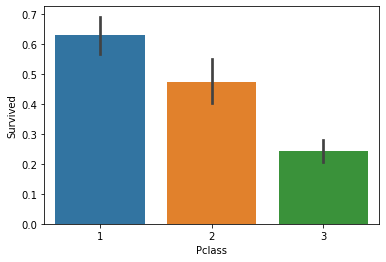

In [8]:
#barplot for survival by pclass
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass=1 who Survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass=2 who Survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass=3 who Survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [9]:
array=np.array(train['SibSp'])
print(np.unique(array))

[0 1 2 3 4 5 8]


Percentage of SibSp=1 who Survived: 53.588516746411486
Percentage of SibSp=2 who Survived: 46.42857142857143
Percentage of SibSp=3 who Survived: 25.0


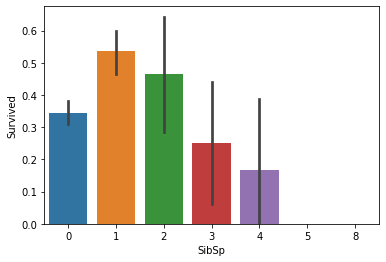

In [10]:
#barplot for survival by pclass
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp=1 who Survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp=2 who Survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp=3 who Survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


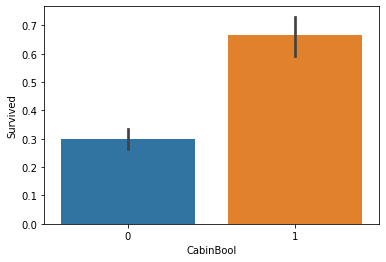

In [11]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
#calculate percentage of cabinBool Vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize= True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize= True)[1]*100)
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

In [18]:
train=train.dropna()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['Survived','Embarked','Name','Cabin','Ticket'],axis=1),
                                               train['Survived'],test_size=0.20,
                                               random_state=8)

In [21]:
train['Sex'] = train['Sex'].map({'male': 0,'female': 1})

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = model.predict(x_test)
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
809,810,1,1,33.0,1,0,53.1000,1
137,138,1,0,37.0,1,0,53.1000,1
496,497,1,1,54.0,1,0,78.2667,1
659,660,1,0,58.0,0,2,113.2750,1
3,4,1,1,35.0,1,0,53.1000,1


In [24]:
accuracy = model.score(x_test,y_test)
print(accuracy*100,'%')

81.08108108108108 %


In [25]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)